**Section 1 - Import Libraries**

In [2]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import stft, istft


**Section 2- Load Clean Speech & Noise Audio**

 We load one clean audio sample (example: yes) and one noise sample from the _background_noise_ folder of the Speech Commands Datasets.

In [3]:
clean_path = r"C:\Users\saura\OneDrive\Desktop\4th year\MA515\Final project\dataset\yes\00f0204f_nohash_0.wav"
noise_path = r"C:\Users\saura\OneDrive\Desktop\4th year\MA515\Final project\dataset\_background_noise_\white_noise.wav"

sr = 16000  # sampling rate

clean, _ = librosa.load(clean_path, sr=sr)
noise, _ = librosa.load(noise_path, sr=sr)

# Trim noise to clean length
noise = noise[:len(clean)]


**Section 3- Create a Noisy Speech Signal**

We artificially add noise so that we can test the SVD denoising method.
The noise factor controls how loud the noise is relative to clean speech

In [62]:
noise_factor = 0.01  
noisy = clean + noise_factor * noise


**Section 4-Convert the signal to a spectrogram**

We use the Short-Time Fourier Transform (STFT) to obtain a time–frequency representation.
- Speech patterns appear as structured shapes
- Noise spreads across all frequencies
- SVD separates structure (speech) from unstructured noise

In [63]:
f, t, Zxx = stft(noisy, fs=sr, nperseg=512)
spectrogram = np.abs(Zxx)


**Section 5 - Apply SVD**

Perform SVD:

$𝐴=𝑈Σ𝑉^T$  
 A low-rank approximation keeps only the top k singular values.  
 
This removes noise while retaining the important structure of speech.

In [64]:
U, S, Vt = np.linalg.svd(spectrogram, full_matrices=False)

k = 10  # choose rank
S_reduced = np.zeros_like(S)
S_reduced[:k] = S[:k]

spectrogram_denoised = (U * S_reduced) @ Vt


**Section 6- Reconstruct the Time-Domain Signal**

We reconstruct:
- The denoised spectrogram
- Reinsert the original phase
- Apply inverse STFT to get the audio back

In [65]:
Zxx_denoised = spectrogram_denoised * np.exp(1j * np.angle(Zxx))
_, denoised = istft(Zxx_denoised, fs=sr)
if len(denoised) > len(clean):
    denoised = denoised[:len(clean)]
else:
    denoised = np.pad(denoised, (0, len(clean) - len(denoised)))


**Section 7- SNR computation**

We compare:

- Noisy vs Clean

- Denoised vs Clean

Higher SNR = better quality.

In [66]:
def snr(clean, signal):
    power_clean = np.sum(clean**2)
    power_noise = np.sum((clean - signal)**2)
    return 10 * np.log10(power_clean / power_noise)

snr_noisy = snr(clean, noisy)
snr_denoised = snr(clean, denoised)

print("SNR (Noisy):  ", snr_noisy)
print("SNR (Denoised): ", snr_denoised)


SNR (Noisy):   9.419912
SNR (Denoised):  9.788965


**Section 8- Plot Waveforms**

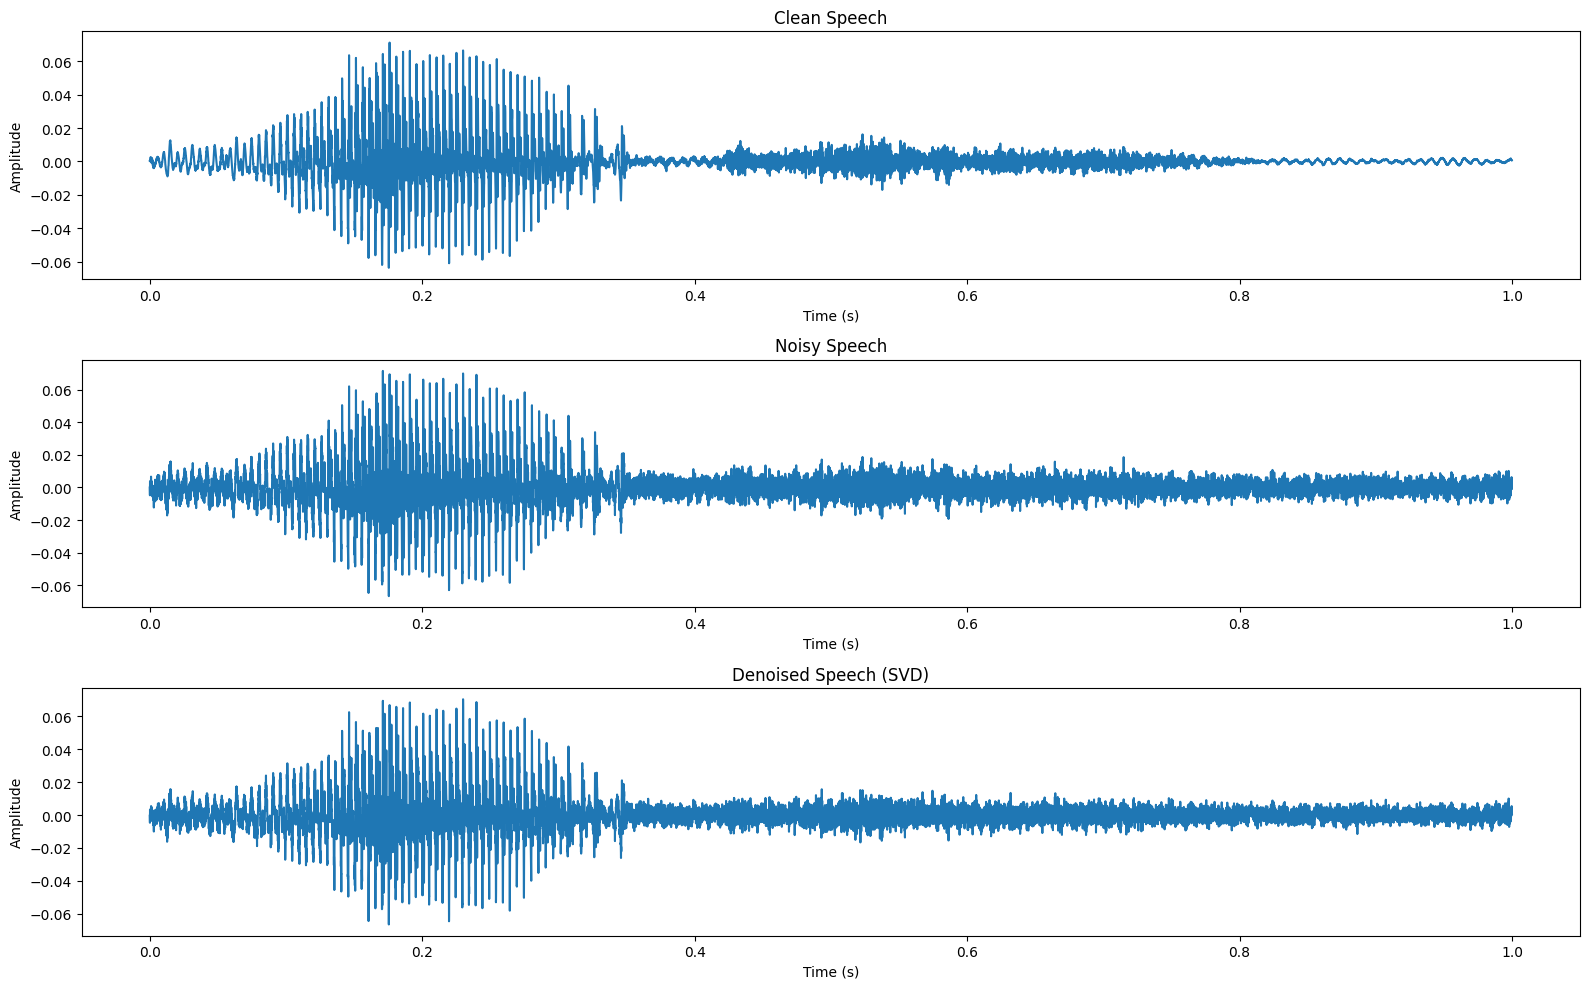

In [67]:
t = np.arange(len(clean)) / sr

plt.figure(figsize=(16, 10))

plt.subplot(3, 1, 1)
plt.plot(t, clean)
plt.title("Clean Speech")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(t, noisy)
plt.title("Noisy Speech")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(t, denoised)
plt.title("Denoised Speech (SVD)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


**Section 9- Plot Spectrograms**

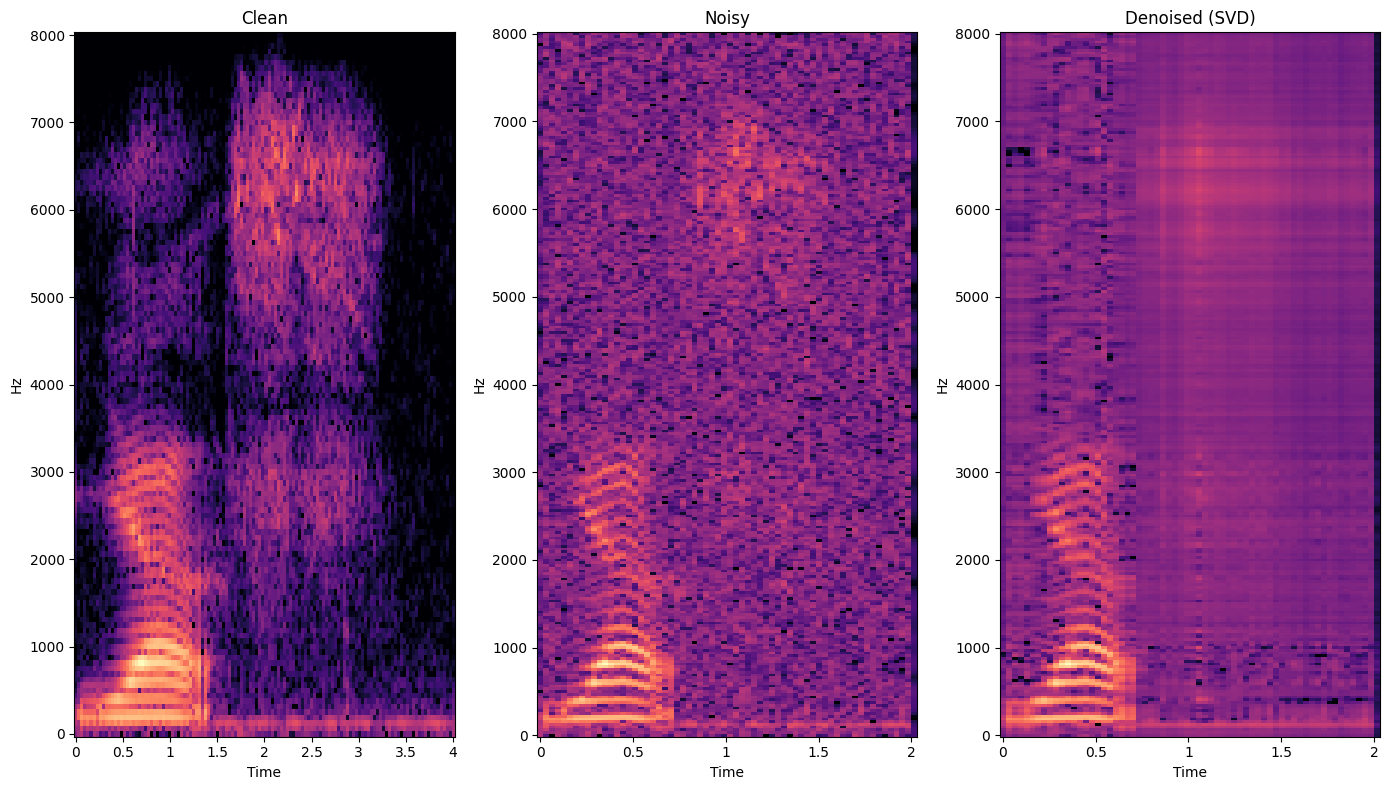

In [68]:
plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
plt.title("Clean")
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(stft(clean)[2]), ref=np.max),
    sr=sr, x_axis='time', y_axis='hz'
)

plt.subplot(1, 3, 2)
plt.title("Noisy")
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(Zxx), ref=np.max),
    sr=sr, x_axis='time', y_axis='hz'
)

plt.subplot(1, 3, 3)
plt.title("Denoised (SVD)")
librosa.display.specshow(
    librosa.amplitude_to_db(spectrogram_denoised, ref=np.max),
    sr=sr, x_axis='time', y_axis='hz'
)

plt.tight_layout()
plt.show()


SNR (Noisy):   9.419912
SNR (Denoised):  8.260811


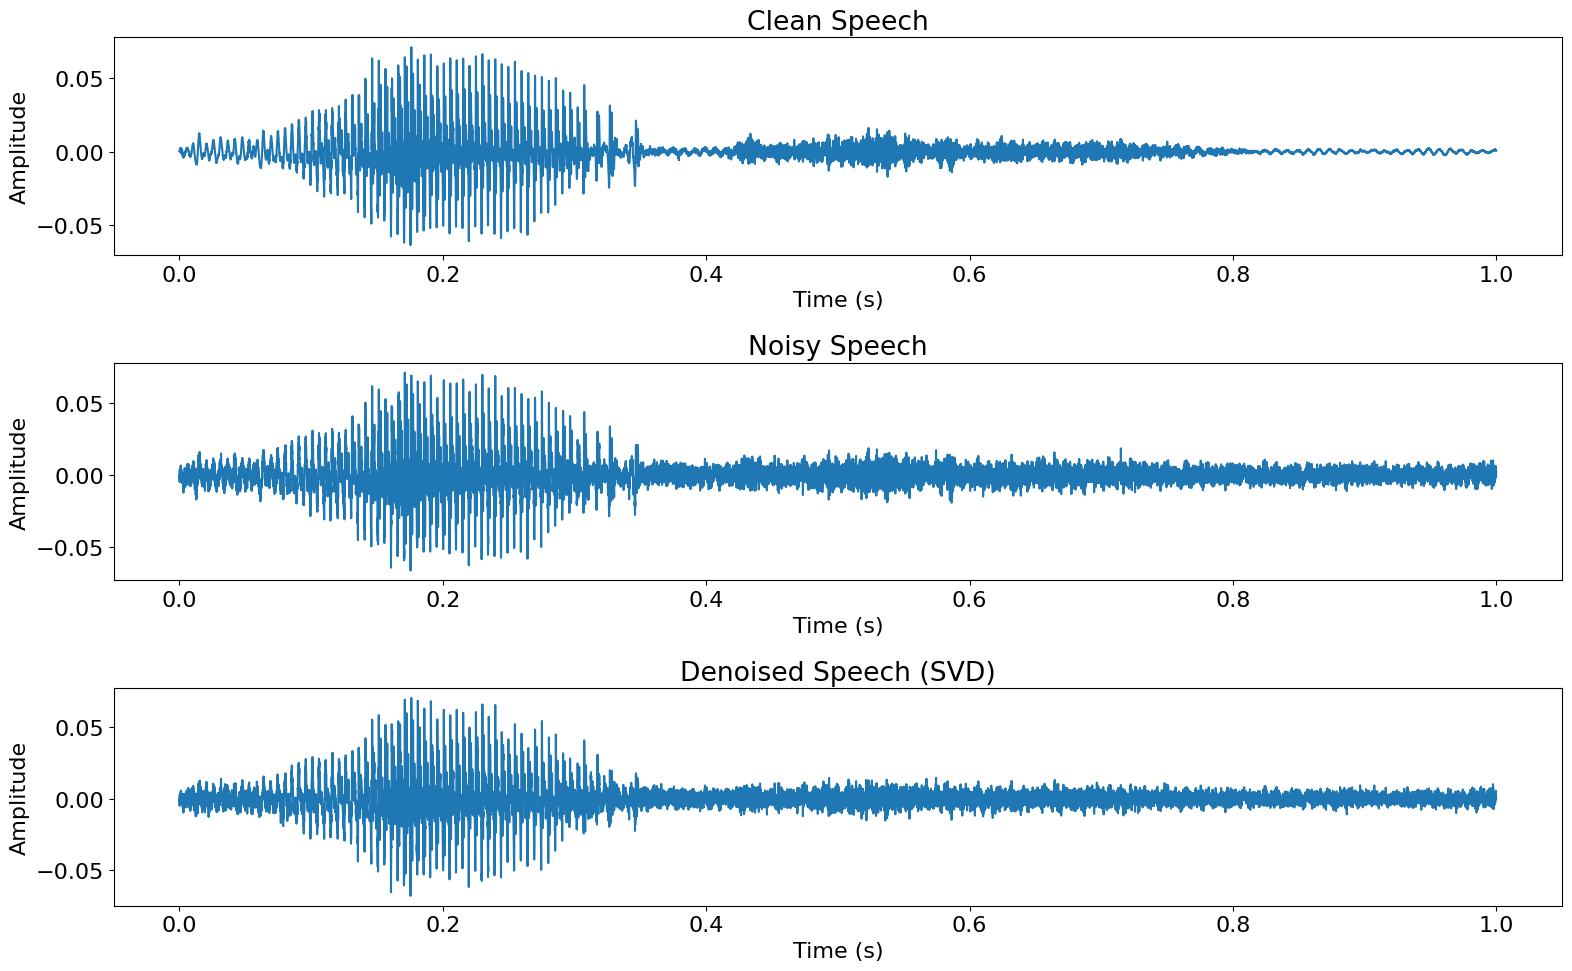

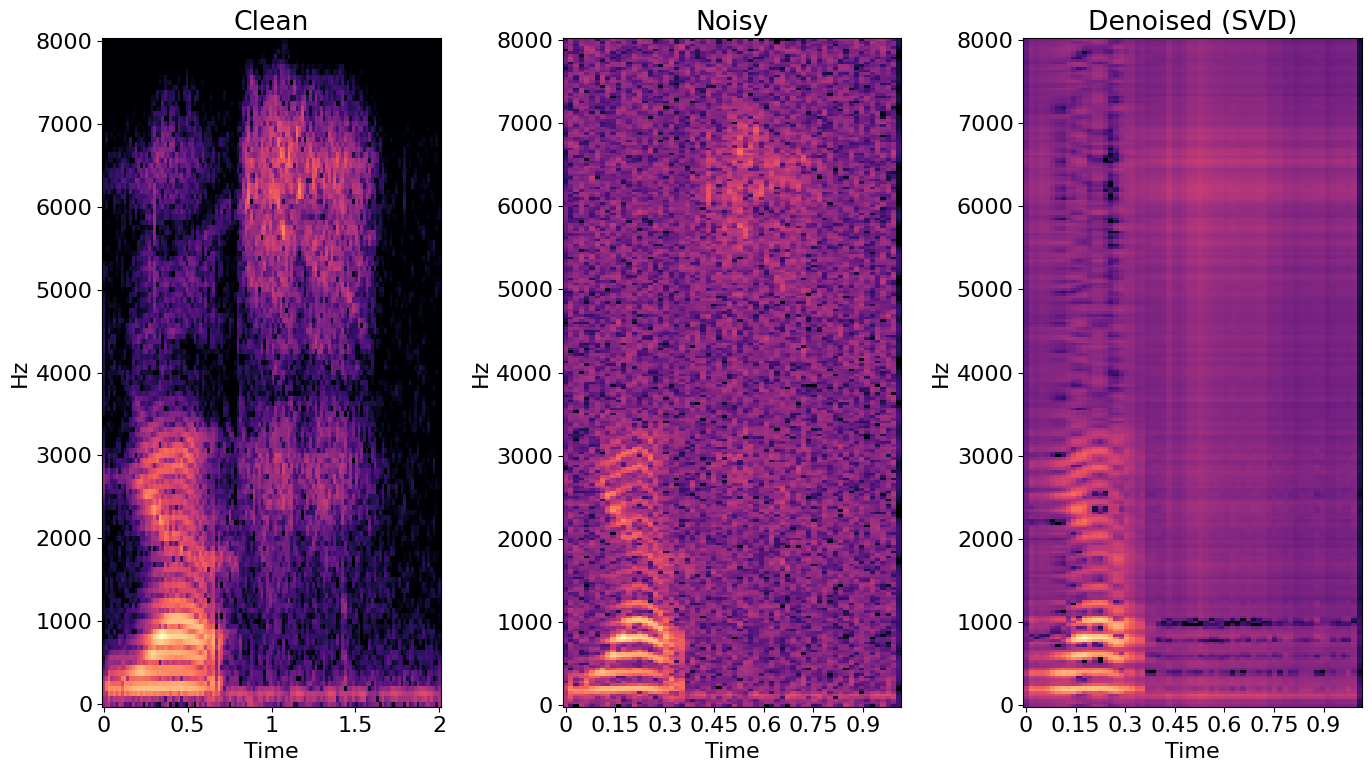

In [84]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from scipy.signal import stft, istft
clean_path = r"C:\Users\saura\OneDrive\Desktop\4th year\MA515\Final project\dataset\yes\00f0204f_nohash_0.wav"
noise_path = r"C:\Users\saura\OneDrive\Desktop\4th year\MA515\Final project\dataset\_background_noise_\white_noise.wav"

sr = 16000  # sampling rate

clean, _ = librosa.load(clean_path, sr=sr)
noise, _ = librosa.load(noise_path, sr=sr)

# Trim noise to clean length
noise = noise[:len(clean)]
noise_factor = 0.01  
noisy = clean + noise_factor * noise

f, t, Zxx = stft(noisy, fs=sr, nperseg=512)
spectrogram = np.abs(Zxx)
U, S, Vt = np.linalg.svd(spectrogram, full_matrices=False)

k = 5  # choose rank
S_reduced = np.zeros_like(S)
S_reduced[:k] = S[:k]

spectrogram_denoised = (U * S_reduced) @ Vt

Zxx_denoised = spectrogram_denoised * np.exp(1j * np.angle(Zxx))
_, denoised = istft(Zxx_denoised, fs=sr)
if len(denoised) > len(clean):
    denoised = denoised[:len(clean)]
else:
    denoised = np.pad(denoised, (0, len(clean) - len(denoised)))

def snr(clean, signal):
    power_clean = np.sum(clean**2)
    power_noise = np.sum((clean - signal)**2)
    return 10 * np.log10(power_clean / power_noise)

snr_noisy = snr(clean, noisy)
snr_denoised = snr(clean, denoised)

print("SNR (Noisy):  ", snr_noisy)
print("SNR (Denoised): ", snr_denoised)

t = np.arange(len(clean)) / sr
plt.rcParams.update({'font.size': 16})

plt.figure(figsize=(16, 10))

plt.subplot(3, 1, 1)
plt.plot(t, clean)
plt.title("Clean Speech")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 2)
plt.plot(t, noisy)
plt.title("Noisy Speech")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.subplot(3, 1, 3)
plt.plot(t, denoised)
plt.title("Denoised Speech (SVD)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 8))

plt.subplot(1, 3, 1)
plt.title("Clean")
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(stft(clean)[2]), ref=np.max),
    sr=sr,hop_length=256, x_axis='time', y_axis='hz'
)

plt.subplot(1, 3, 2)
plt.title("Noisy")
librosa.display.specshow(
    librosa.amplitude_to_db(np.abs(Zxx), ref=np.max),
    sr=sr,hop_length=256, x_axis='time', y_axis='hz'
)

plt.subplot(1, 3, 3)
plt.title("Denoised (SVD)")
librosa.display.specshow(
    librosa.amplitude_to_db(spectrogram_denoised, ref=np.max),
    sr=sr,hop_length=256, x_axis='time', y_axis='hz'
)

plt.tight_layout()
plt.show()





Best k for SNR Gain: 19
Maximum SNR Gain: 0.6130285
SNR_Noisy 9.419912
SNR_denoised 10.032941


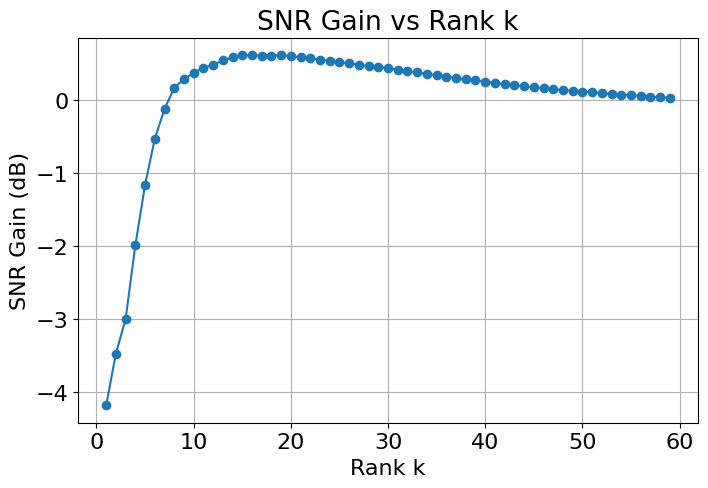

In [91]:
# Compute SNR(noisy) once

k_values = range(1, 60)   # sweep k from 1 to 59
snr_gain_list = []
snr_list = []

for k in k_values:

    # Build reduced sigma
    S_reduced = np.zeros_like(S)
    S_reduced[:k] = S[:k]

    # Low-rank reconstruction
    S_k = (U * S_reduced) @ Vt

    # ISTFT
    Zxx_k = S_k * np.exp(1j * np.angle(Zxx))
    _, yk = istft(Zxx_k, fs=sr)

    # Match lengths
    if len(yk) > len(clean):
        yk = yk[:len(clean)]
    else:
        yk = np.pad(yk, (0, len(clean) - len(yk)))

    # SNR of denoised signal
    snr_k = snr(clean, yk)
    snr_list.append(snr_k)
    # Compute SNR gain
    snr_gain = snr_k - snr_noisy
    snr_gain_list.append(snr_gain)

# Print best rank
best_k = k_values[np.argmax(snr_gain_list)]
print("Best k for SNR Gain:", best_k)
print("Maximum SNR Gain:", max(snr_gain_list))
k = best_k  # choose rank
S_reduced = np.zeros_like(S)
S_reduced[:k] = S[:k]

spectrogram_denoised = (U * S_reduced) @ Vt

Zxx_denoised = spectrogram_denoised * np.exp(1j * np.angle(Zxx))
_, denoised = istft(Zxx_denoised, fs=sr)
if len(denoised) > len(clean):
    denoised = denoised[:len(clean)]
else:
    denoised = np.pad(denoised, (0, len(clean) - len(denoised)))

def snr(clean, signal):
    power_clean = np.sum(clean**2)
    power_noise = np.sum((clean - signal)**2)
    return 10 * np.log10(power_clean / power_noise)

snr_noisy = snr(clean, noisy)
snr_denoised = snr(clean, denoised)
print("SNR_Noisy",snr_noisy)
print("SNR_denoised",snr_denoised)
# Plot SNR Gain vs k
plt.figure(figsize=(8,5))
plt.plot(k_values, snr_gain_list, marker='o')
plt.xlabel("Rank k")
plt.ylabel("SNR Gain (dB)")
plt.title("SNR Gain vs Rank k")
plt.grid(True)
plt.show()

